## California Housing Prices

<html>
<body>
    
<img src="https://www.bankrate.com/2023/03/25160434/Mortgages-Summer-Housing-Market-Predictions.jpg" width = "800"                height = "600" />

</body>
</html>

### Importing libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


### Loading data

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


### Data Cleaning

In [5]:
train_data = data.copy()

In [6]:
train_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
train_data.dropna(inplace = True)

In [8]:
train_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [9]:
train_data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [10]:
train_data["ocean_proximity"].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
# One hot encoding
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity))

In [12]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [13]:
train_data = train_data.drop(columns = ["ocean_proximity"], axis = 1)

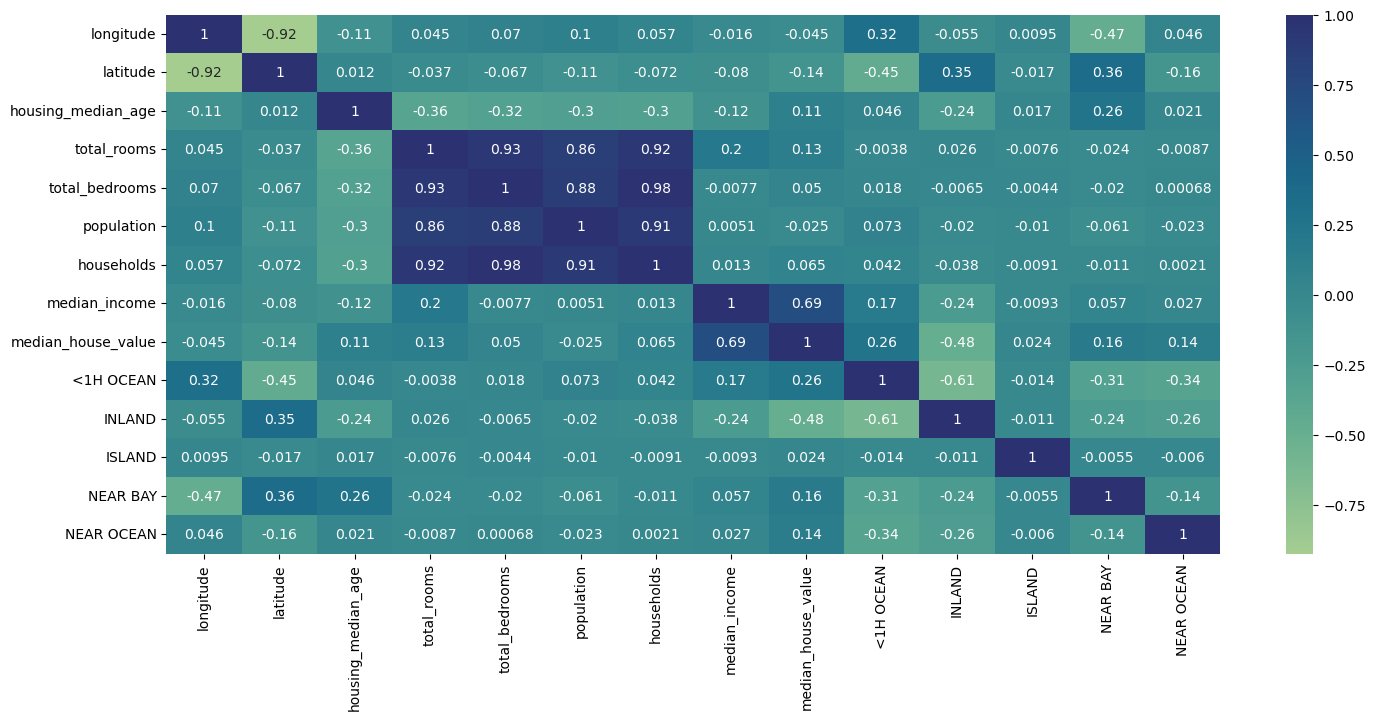

In [14]:
# lets check how our new features correlate with price
plt.figure(figsize = (17, 7))
sns.heatmap(train_data.corr(), annot = True, cmap = "crest")
plt.show()

### Exploratory data analysis(EDA)

In [15]:
train_data.shape # shape of the data

(20433, 14)

In [16]:
train_data.columns # Features or columns of the data

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')

In [17]:
train_data.info()  # a detailed information about data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   <1H OCEAN           20433 non-null  uint8  
 10  INLAND              20433 non-null  uint8  
 11  ISLAND              20433 non-null  uint8  
 12  NEAR BAY            20433 non-null  uint8  
 13  NEAR OCEAN          20433 non-null  uint8  
dtypes: float64(9), uint8(5)
memory usage: 2.2 MB


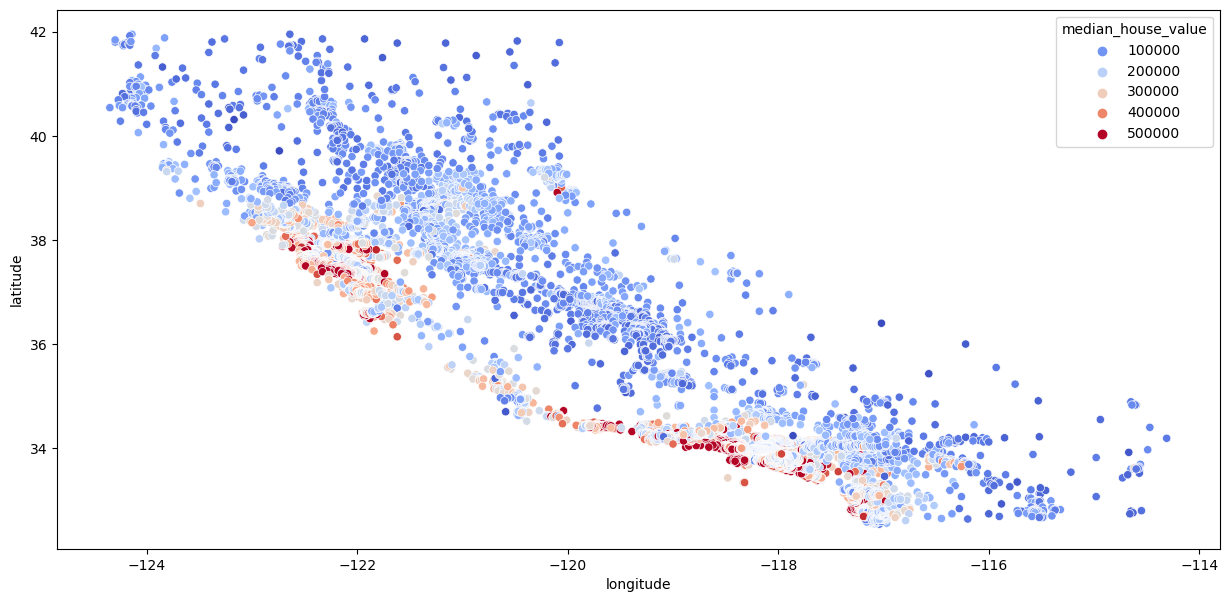

In [18]:
plt.figure(figsize = (15, 7))
sns.scatterplot(x = "longitude", y = "latitude", data = train_data, hue = "median_house_value", palette = "coolwarm")
plt.show()

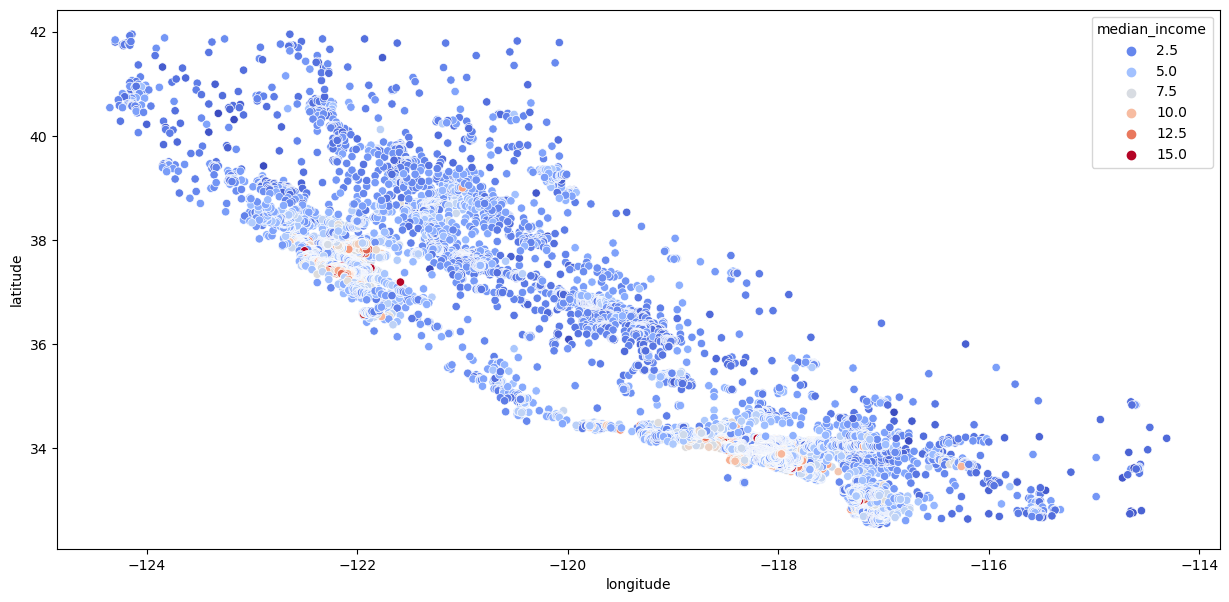

In [19]:
plt.figure(figsize = (15, 7))
sns.scatterplot(x = "longitude", y = "latitude", data = train_data, hue = "median_income", palette = "coolwarm")
plt.show()

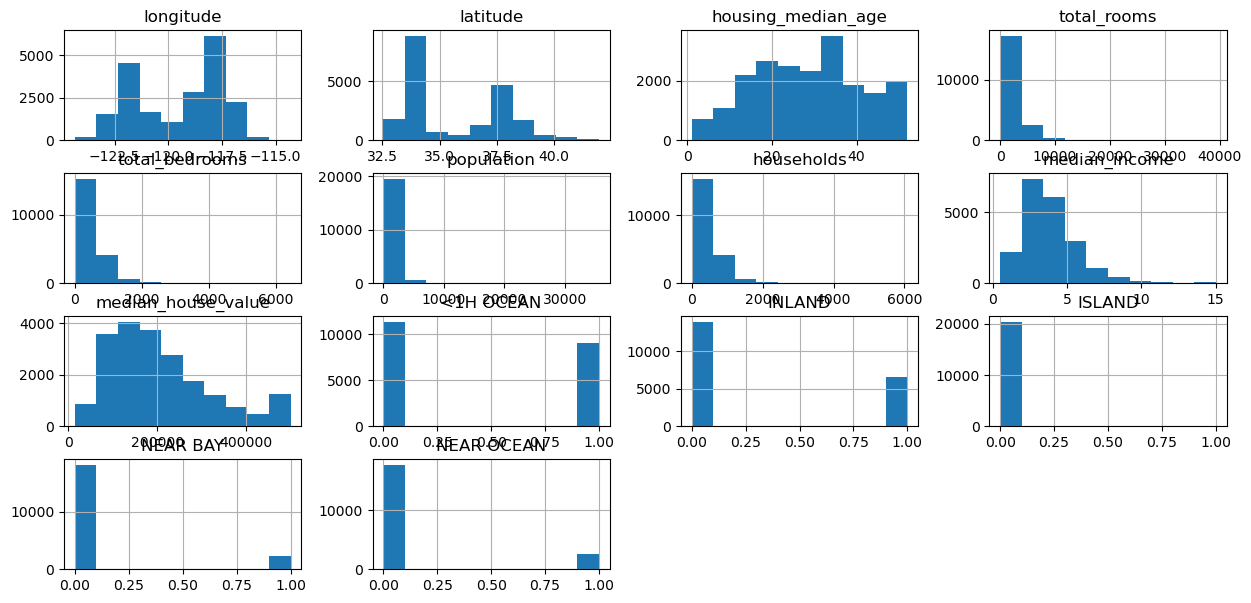

In [20]:
train_data.hist(figsize = (15, 7))
plt.show()

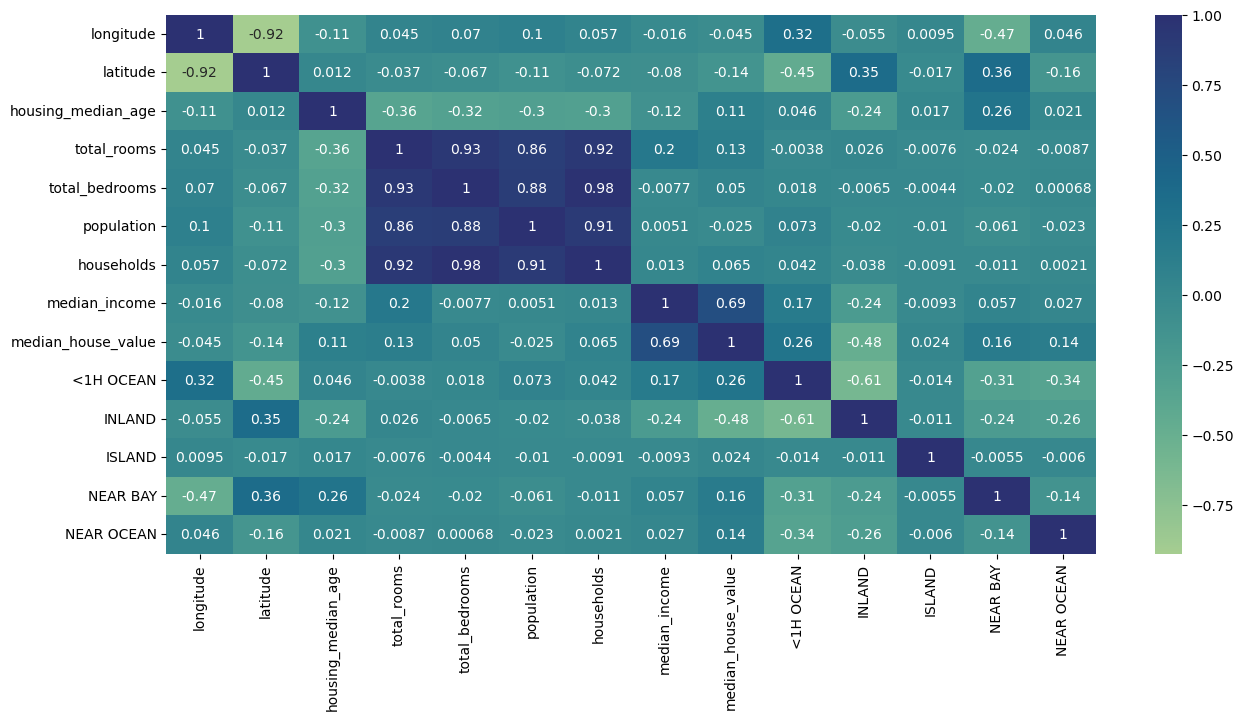

In [21]:
plt.figure(figsize = (15, 7))
sns.heatmap(train_data.corr(), annot = True, cmap = "crest")
plt.show()

### Feature selection

In [22]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


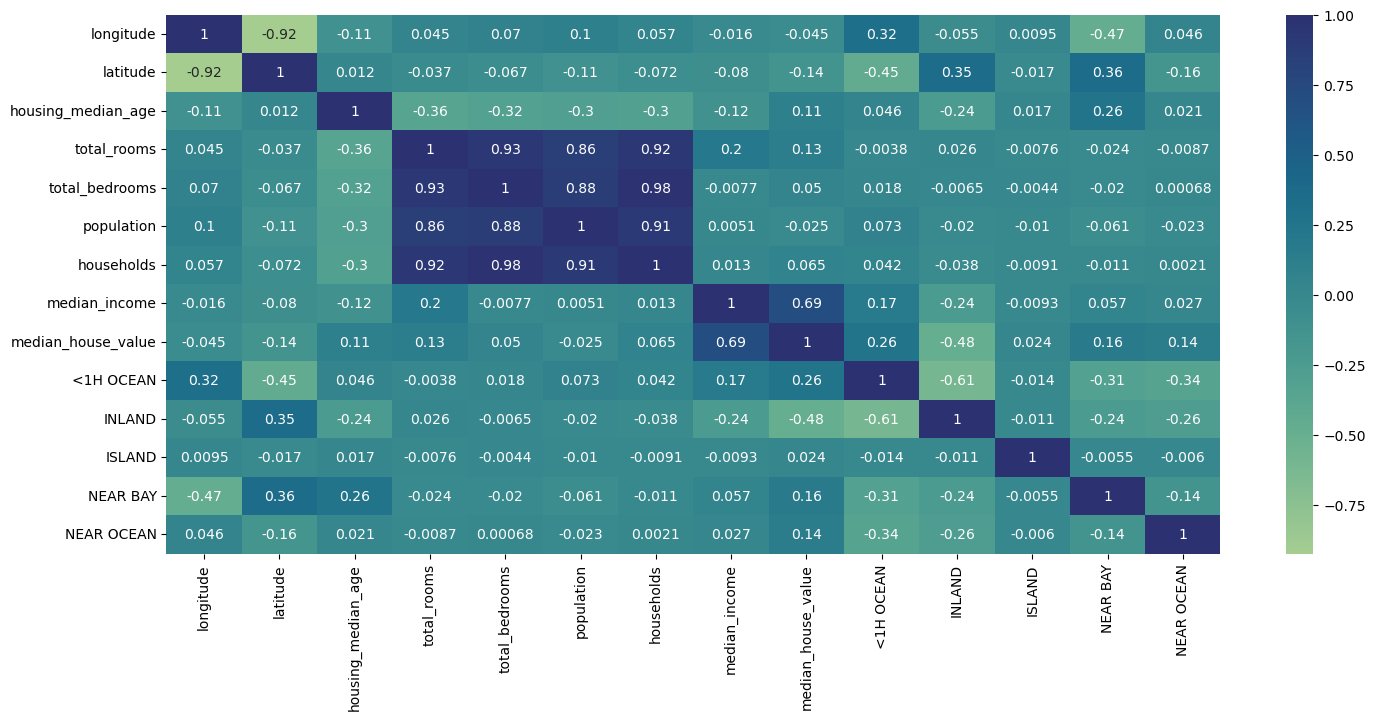

In [23]:
# lets check how our new features correlate with price
plt.figure(figsize = (17, 7))
sns.heatmap(train_data.corr(), annot = True, cmap = "crest")
plt.show()

In [24]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]

In [25]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,0.146591,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,0.155797,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,0.129516,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,0.184458,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,0.172096,6.281853


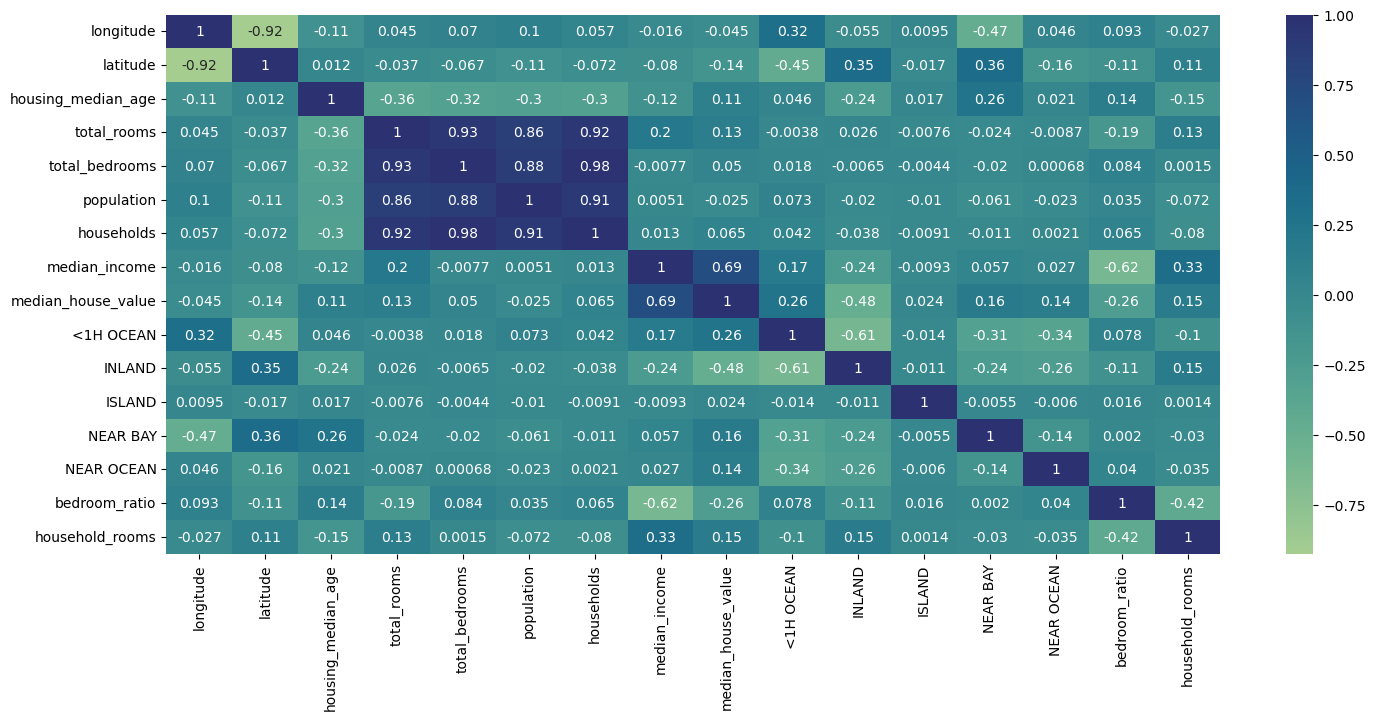

In [26]:
# lets check how our new features correlate with price
plt.figure(figsize = (17, 7))
sns.heatmap(train_data.corr(), annot = True, cmap = "crest")
plt.show()

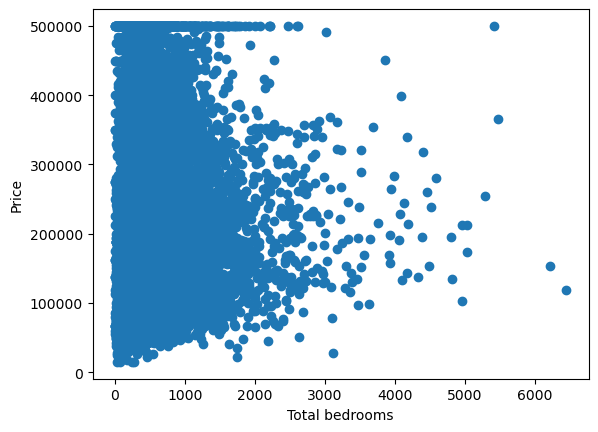

In [27]:
plt.scatter(train_data["total_bedrooms"], train_data["median_house_value"])
plt.xlabel("Total bedrooms")
plt.ylabel("Price")
plt.show()

In [28]:
train_data.corr()[['median_house_value']].style.background_gradient(cmap='YlOrBr')

,median_house_value
longitude,-0.045398
latitude,-0.144638
housing_median_age,0.106432
total_rooms,0.133294
total_bedrooms,0.049686
population,-0.025300
households,0.064894
median_income,0.688355
median_house_value,1.000000
<1H OCEAN,0.257614


### Model Creation

### 1. Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
x = train_data.drop(columns = ["median_house_value"], axis = 1)
y = train_data["median_house_value"]

In [31]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0,0.146591,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0,0.155797,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0,0.129516,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0,0.184458,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0,0.172096,6.281853


In [32]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [33]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [34]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [35]:
# Creating an instance of the StandardScaler
scaler = StandardScaler()

# Fitting the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [36]:
# Creating an instance of the Linear Regression model
model = LinearRegression()

# Training the model using the scaled training data
model.fit(X_train_scaled, y_train)


LinearRegression()

In [37]:
# Making predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

In [38]:
y_pred

array([211819.06503401, 146952.22613999, 203278.62163874, ...,
       107882.85140185, 133661.89054336, 160051.05491222])

In [39]:
residuals = y_test - y_pred

In [40]:
# Evaluating the model's performance using R-squared score
lr_accuracy = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2:", lr_accuracy)
print("MSE:", mse)

R2: 0.6514520892808395
MSE: 4766455691.684079


### Linear regression using OSlP

In [41]:
import statsmodels.api as sm

In [42]:
x = train_data.drop(columns = ["median_house_value"], axis = 1)
y = train_data["median_house_value"]

In [43]:
x1 = sm.add_constant(x)


In [44]:
model = sm.OLS(y, x1)

In [45]:
results = model.fit() 

In [46]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     2758.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:22:14   Log-Likelihood:            -2.5632e+05
No. Observations:               20433   AIC:                         5.127e+05
Df Residuals:                   20418   BIC:                         5.128e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.014e+06   7.36

In [47]:
results.params

const                -2.014421e+06
longitude            -2.778317e+04
latitude             -2.627738e+04
housing_median_age    1.085806e+03
total_rooms           2.188150e+00
total_bedrooms        1.850881e+01
population           -4.010972e+01
households            9.882298e+01
median_income         4.129035e+04
<1H OCEAN            -4.254041e+05
INLAND               -4.600113e+05
ISLAND               -2.780970e+05
NEAR BAY             -4.296174e+05
NEAR OCEAN           -4.212915e+05
bedroom_ratio         2.741616e+05
household_rooms       2.692960e+03
dtype: float64

### 2. Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()

# Fitting model with default opaarmeters
random_forest.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [49]:
y_pred = random_forest.predict(X_test_scaled)

In [50]:
# Evaluating the model's performance using R-squared score
rf_accuracy = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
print("R2:", rf_accuracy)
print("MSE:", mse)

R2: 0.8236513648169361
MSE: 2411599467.501346


#### Using GridSearchCV to find the best parameters for RandomForestRegressor model

In [51]:
# Grid search to find best depth and estimators
random_forest2 = RandomForestRegressor(random_state = 41)
params_grid = {
     'max_depth':[3,4,5,6,7,8,9,10],
     'n_estimators':[20,50,70,100]
    }
grid = GridSearchCV(random_forest2, params_grid, cv = 5)
grid.fit(X_train_scaled, y_train)
print(f'the best value of max_depth, n_estimators = {grid.best_params_}')

the best value of max_depth, n_estimators = {'max_depth': 10, 'n_estimators': 100}


In [52]:
random_forest1 = RandomForestRegressor(max_depth = 10,n_estimators = 100)
random_forest1.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=10)

In [53]:
# Making predictions on the scaled test data
y_pred = random_forest1.predict(X_test_scaled)

In [54]:
# Evaluating the model's performance using R-squared score
accuracy_random_forest1 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
print("R2:", accuracy_random_forest1)
print("MSE:", mse)

R2: 0.7830704589926306
MSE: 2966550691.11034


### 3. KNN

In [55]:
knn_model = KNeighborsRegressor()

params = {'n_neighbors': [3,5,7,9,11,13,15,17,19]}
grid = GridSearchCV(
 knn_model,
 params,
 cv = 5
)
grid.fit(X_train_scaled, y_train)
print(f'the best value of k = {grid.best_params_}')

the best value of k = {'n_neighbors': 9}


In [56]:
knn = KNeighborsRegressor(n_neighbors = 9)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=9)

In [57]:
y_pred = knn.predict(X_test_scaled)

In [58]:
# Evaluating the model's performance using R-squared score
knn_accuracy = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
print("R2:", knn_accuracy)
print("MSE:", mse)

R2: 0.7289165233767833
MSE: 3707115550.9330945


### Model Performance comparision

In [59]:
model_performance = { "Linear Regression": lr_accuracy * 100,
                      "Random Forest": rf_accuracy * 100,
                       "KNN": knn_accuracy * 100 }

In [60]:
model_performance

{'Linear Regression': 65.14520892808395,
 'Random Forest': 82.36513648169361,
 'KNN': 72.89165233767832}

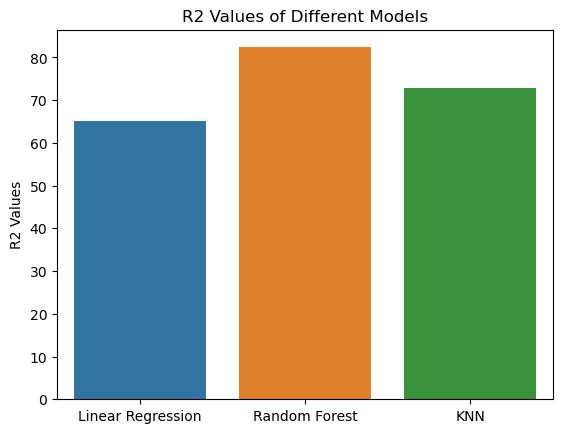

In [61]:
models = list(model_performance.keys())
r2_values = list(model_performance.values())

sns.barplot(x = models, y = r2_values)
plt.ylabel('R2 Values')
plt.title('R2 Values of Different Models')
plt.show()